# Toxic Comment Classification Challenge

The model was built for the Toxic Comment Classification Challenge in Kaggle.

#### File descriptions:
- train.csv - the training set, contains comments with their binary labels.

- test.csv - the test set - predict the toxicity probabilities for these comments. To deter hand labeling, the test set contains some comments which are not included in scoring.


In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from utils import *


In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

## Check data

In [3]:
print(train_data.shape)
print(test_data.shape)

(159571, 8)
(153164, 2)


In [4]:
train_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [15]:
test_data.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [42]:
print(train_data.comment_text[5])

"

Congratulations from me as well, use the tools well.  · talk "


Max length:  5000 
Min length:  6 
Avg length:  394.0732213246768 
Median length:  205.0


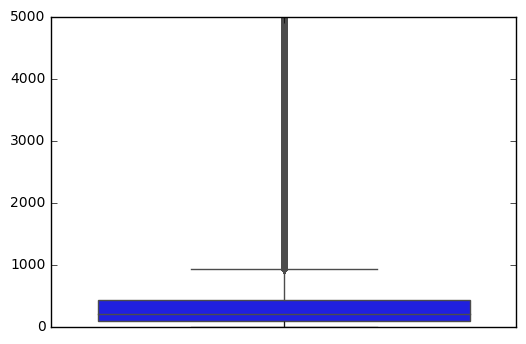

In [32]:
#Check length of the comments:
len_comment = list(train_data.comment_text.str.len())
print ('Max length: ',max(len_comment),
      '\nMin length: ',min(len_comment),
      '\nAvg length: ', np.mean(len_comment),
      '\nMedian length: ', np.median(len_comment))
sns.boxplot(y = len_comment)
plt.show()

In [26]:
# Create a column None for non-toxic comments:
label_cols =['toxic', 'severe_toxic','obscene','threat','insult','identity_hate']
train_data['none'] = 1 - train_data[label_cols].max(axis = 1)


In [28]:
train_data.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,none
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,1
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,1
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,1
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,1


In [33]:
print ('Number of toxic comments: ', sum(train_data.toxic))
print ('Number of severe_toxic comments: ', sum(train_data.severe_toxic))
print ('Number of obscene comments: ', sum(train_data.obscene))
print ('Number of threat comments: ', sum(train_data.threat))
print ('Number of insult comments: ', sum(train_data.insult))
print ('Number of indentity_hate comments: ', sum(train_data.identity_hate))
print ('Number of none: ', sum(train_data.none))


Number of toxic comments:  15294
Number of severe_toxic comments:  1595
Number of obscene comments:  8449
Number of threat comments:  478
Number of insult comments:  7877
Number of indentity_hate comments:  1405
Number of none:  143346


In [34]:
train_data.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,none
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,0.898321
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,0.302226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Clean comments

In [53]:
comment_train = train_data.comment_text.fillna("_na_").values
comment_test = test_data.comment_text.fillna("_na_").values
label_train = train_data[label_cols].values

In [54]:
label_train[6]

array([1, 1, 1, 0, 1, 0], dtype=int64)

In [80]:
#Set up basic config parameters:
maxLen = 100
maxFeatures = 20000
embed_size = 50

In [83]:
#Text preprocessing using Keras:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = maxFeatures)
tokenizer.fit_on_texts(list(comment_train))
tokenized_train = tokenizer.texts_to_sequences(comment_train)
tokenized_test = tokenizer.texts_to_sequences(comment_test)


In [87]:
#Pad sequence using Keras:
from keras.preprocessing.sequence import pad_sequences

X_trainset = pad_sequences(tokenized_train, maxlen = maxLen)
X_testset = pad_sequences(tokenized_test, maxlen = maxLen)

In [88]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_trainset, 
                                                    label_train, 
                                                    random_state=4)

## Use LSTM and GloVe 

In [110]:
from keras.models import Model
from keras.layers import Dense, Input, Dropout, LSTM, Activation, Bidirectional, GlobalMaxPooling1D
from keras.layers.embeddings import Embedding


In [40]:
# Load GloVe model:
word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('glove.6B.50d.txt')

In [48]:
def pretrained_embedding_layer(word_to_vec_map, word_to_index):
    """
    Creates a Keras Embedding() layer and loads in pre-trained GloVe 50-dimensional vectors.
    
    Arguments:
    word_to_vec_map -- dictionary mapping words to their GloVe vector representation.
    word_to_index -- dictionary mapping from words to their indices in the vocabulary (400,001 words)

    Returns:
    embedding_layer -- pretrained layer Keras instance
    """
    
    vocab_len = len(word_to_index) + 1                  
    
    # define dimensionality of your GloVe word vectors
    emb_dim = word_to_vec_map["cucumber"].shape[0] 
    
    # Initialize the embedding matrix 
    emb_matrix = np.zeros((vocab_len, emb_dim))
    
    # Set each row "index" of the embedding matrix to be the word vector representation of the "index"th word of the vocabulary
    for word, index in word_to_index.items():
        emb_matrix[index, :] = word_to_vec_map[word]

    # Define Keras embedding layer  
    embedding_layer = Embedding(vocab_len, emb_dim, trainable=False)

    # Build the embedding layer
    embedding_layer.build((None,))
    
    # Set the weights of the embedding layer to the embedding matrix
    embedding_layer.set_weights([emb_matrix])
    
    return embedding_layer

In [100]:
def Toxic_classfication_model(input_shape, word_to_vec_map, word_to_index):    
    
    sentence_indices = Input(shape = input_shape, dtype= 'int32')

    embedding_layer = pretrained_embedding_layer(word_to_vec_map, word_to_index)
    embeddings = embedding_layer(sentence_indices)   
    
    X = LSTM(128,return_sequences =True)(embeddings)
    X = Dropout(0.5)(X)
    X = LSTM(128, return_sequences = False)(X)
    X = Dropout(0.5)(X)
    X = Dense(6)(X)
    X = Activation('softmax')(X)
    
    model = Model(inputs = sentence_indices, outputs = X)
   
    return model

In [101]:
model = Toxic_classfication_model((maxLen,), word_to_vec_map, word_to_index)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 100)               0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 100, 50)           20000050  
_________________________________________________________________
lstm_5 (LSTM)                (None, 100, 128)          91648     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100, 128)          0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 774       
__________

In [102]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [104]:
model.fit(X_train, y_train, epochs = 2, batch_size = 32, shuffle=True)

Epoch 1/2
119678/119678 [==============================] - 987s 8ms/step - loss: 0.2980 - acc: 0.9903
Epoch 2/2
119678/119678 [==============================] - 993s 8ms/step - loss: 0.2956 - acc: 0.9894


In [105]:
loss, acc = model.evaluate(X_test, y_test)
print()
print("Test accuracy = ", acc)

39893/39893 [==============================] - 93s 2ms/step

Test accuracy =  0.9934825658636853


## Create a submission file

In [106]:
label_test = model.predict([X_testset], batch_size=1024, verbose=1)
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission[label_cols] = label_test
sample_submission.to_csv('submission.csv', index=False)

153164/153164 [==============================] - 302s 2ms/step


#### This submission only scores 0.73 in Kaggle => this model needs more regularization and different metrics to evaluate


## Try Bidirectional LSTM and train on full training dataset

In [123]:
def Toxic_classfication_modelV2(input_shape, word_to_vec_map, word_to_index):
    
    sentence_indices = Input(shape = input_shape, dtype= 'int32')
    
    embedding_layer = pretrained_embedding_layer(word_to_vec_map, word_to_index)
    embeddings = embedding_layer(sentence_indices)   
    
    X = Bidirectional(LSTM(50,return_sequences =True))(embeddings)
    X = Dropout(0.1)(X)
    X = GlobalMaxPooling1D()(X)
    X = Dense(50, activation = 'relu')(X)
    X = Dropout(0.1)(X)
    X = Dense(6)(X)
    X = Activation('sigmoid')(X)

    model = Model(inputs = sentence_indices, outputs = X)

    return model

In [124]:
model = Toxic_classfication_modelV2((maxLen,), word_to_vec_map, word_to_index)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 100)               0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 100, 50)           20000050  
_________________________________________________________________
bidirectional_3 (Bidirection (None, 100, 100)          40400     
_________________________________________________________________
dropout_11 (Dropout)         (None, 100, 100)          0         
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_12 (Dropout)         (None, 50)                0         
__________

In [125]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [126]:
model.fit(X_trainset, label_train, epochs = 2, batch_size = 32, shuffle=True, validation_split=0.1)

Train on 143613 samples, validate on 15958 samples
Epoch 1/2
143613/143613 [==============================] - 599s 4ms/step - loss: 0.1009 - acc: 0.9694 - val_loss: 0.0835 - val_acc: 0.9742
Epoch 2/2
143613/143613 [==============================] - 557s 4ms/step - loss: 0.0734 - acc: 0.9763 - val_loss: 0.0692 - val_acc: 0.9774


In [127]:
#Save new result to submit
label_test = model.predict([X_testset], batch_size=1024, verbose=1)
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission[label_cols] = label_test
sample_submission.to_csv('submission.csv', index=False)

153164/153164 [==============================] - 94s 614us/step


#### This new submission scores 0.93 in Kaggle, significantly better than the previous model's performance